## <font color='Brown'>Image Classification Case Study using Convolutional Neural Networks</font>
***




**About Convolutional Neural Networks**

deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

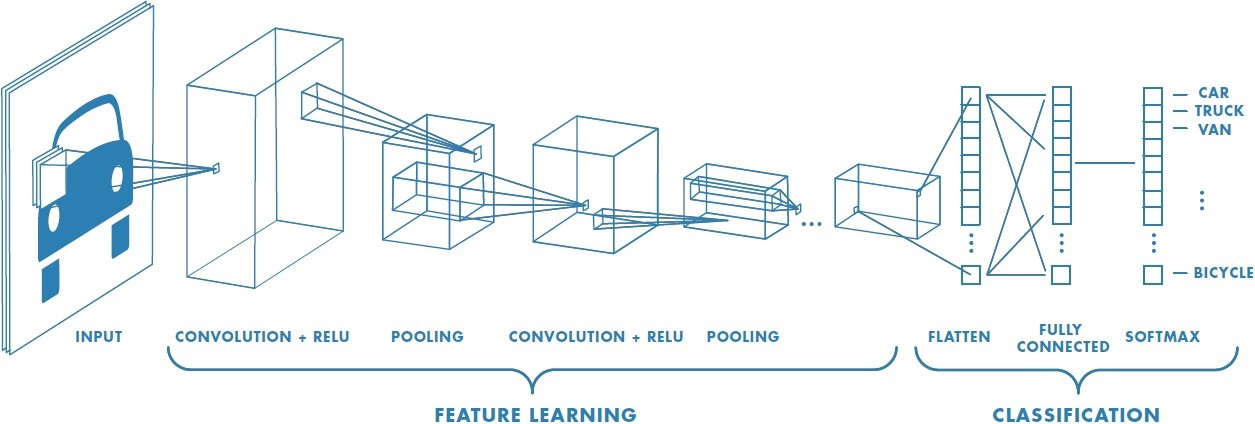

In [2]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
#Importing the dataset
cifar10 = keras.datasets.cifar10
(xtrain,ytrain),(xtest,ytest)= cifar10.load_data()
print("Shape of x_train-->",xtrain.shape)
print("Shape of x_test-->",xtest.shape)

print("Shape of y_train-->",ytrain.shape)
print("Shape of y_test-->",ytest.shape)

Shape of x_train--> (50000, 32, 32, 3)
Shape of x_test--> (10000, 32, 32, 3)
Shape of y_train--> (50000, 1)
Shape of y_test--> (10000, 1)


In [4]:
# Defining array. Each item of array represent integer value of labels.
class_names =['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Dependent Classes--->",class_names)

Dependent Classes---> ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
print("The no. of classess-->",len(class_names))

The no. of classess--> 10


In [6]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

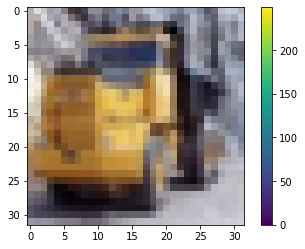

Class ID: 9 and Class name: truck


In [8]:
# inspect the data in the array
index=186 # change this number 
plt.imshow(xtrain[index]) # printing 10th image
plt.colorbar() # shows the bar on the right side of the image
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

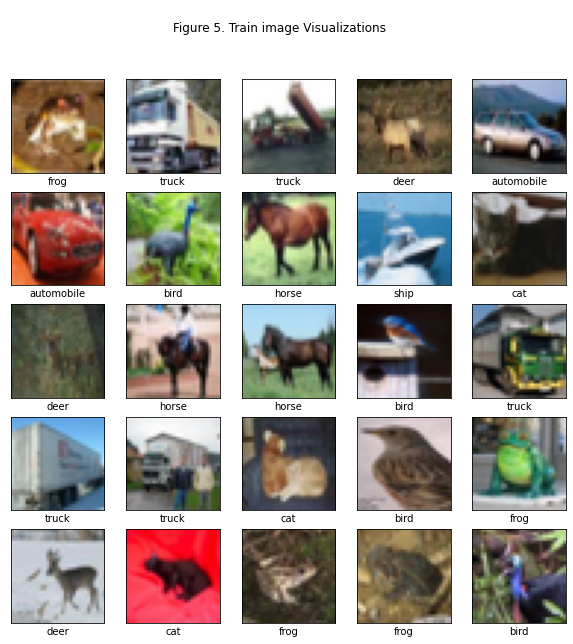

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(xtrain[i])
    ax.set(xticks=[], yticks=[], xlabel = class_names[ytrain[i]])
fig.suptitle('\nFigure 5. Train image Visualizations') 
plt.show() 

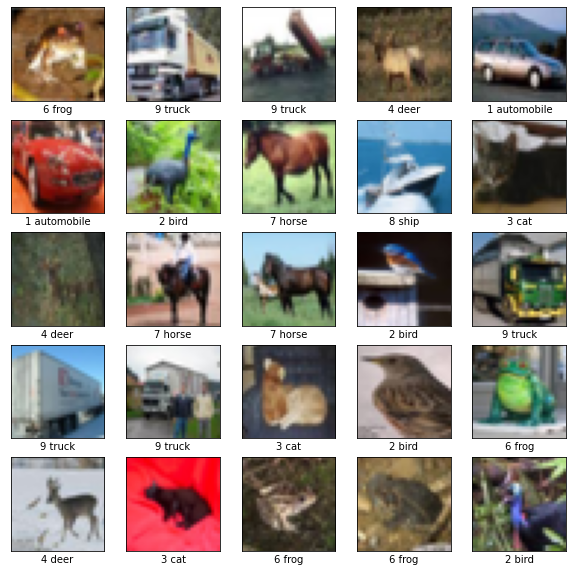

In [10]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

In [11]:
#Scaling the image values

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
xtrain

In [13]:
ytest #classes with respect to test data

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
ytest=ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [15]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)#one hot encoding features
ytest=to_categorical(ytest)#one hot encoding features

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000,) and value: [6 9 9 ... 9 1 1]
ytest Shape: (10000,) and value: [3 8 8 ... 5 1 7]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


#### Building the CNN Architecture

In [16]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

#==================== Creation of empty Architecture ====================#
# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential() #empty network

#==================== Feature Detection / extraction Block ====================#
# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu')) #----> 1st Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2))) #----> 1st Max Pooling Layer

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu')) #----> 2nd Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#----> 2nd Max Pooling Layer

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32,3))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(64, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation
model

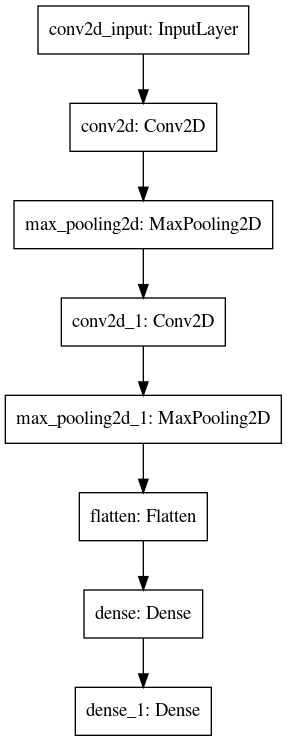

In [17]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
xtrain2[:5]

In [18]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(50000, 32, 32, 3)
xtest2=xtest.reshape(10000,32,32,3)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=20,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/20
50/50 [==============================] - 27s 489ms/step - loss: 1.9601 - accuracy: 0.2984 - val_loss: 1.7065 - val_accuracy: 0.3974
Epoch 2/20
50/50 [==============================] - 24s 476ms/step - loss: 1.6051 - accuracy: 0.4357 - val_loss: 1.5286 - val_accuracy: 0.4655
Epoch 3/20
50/50 [==============================] - 24s 484ms/step - loss: 1.4431 - accuracy: 0.4933 - val_loss: 1.3941 - val_accuracy: 0.5078
Epoch 4/20
50/50 [==============================] - 24s 478ms/step - loss: 1.3443 - accuracy: 0.5293 - val_loss: 1.3190 - val_accuracy: 0.5342
Epoch 5/20
50/50 [==============================] - 24s 479ms/step - loss: 1.2799 - accuracy: 0.5534 - val_loss: 1.2814 - val_accuracy: 0.5452
Epoch 6/20
50/50 [==============================] - 24s 475ms/step - loss: 1.2320 - accuracy: 0.5701 - val_loss: 1.2401 - val_accuracy: 0.5689
Epoch 7/20
50/50 [==============================] - 24s 474ms/step - loss: 1.1922 - accuracy: 0.5858 - val_loss: 1.1887 - val_accuracy: 0.5835

In [21]:
# evaluate accuracy of the model
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("test accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.9985 - accuracy: 0.6563
test accuracy: 0.6563000082969666


In [22]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 4s 11ms/step
1. Prediction array: [1.5631933e-02 1.7744426e-04 8.7268300e-02 5.9236860e-01 3.0596012e-02
 1.9498183e-01 3.2544181e-02 2.3305677e-03 4.3470327e-02 6.3087110e-04]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [23]:
# creating a funtion which will help to verify the prediction is true of not
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    # print(predicted_label)
    # print(true_label)

    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour

    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),color=color)
  



In [24]:
##function to display bar chart showing whether image prediction is how much correct  

def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

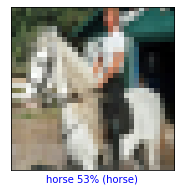

In [25]:
# call the function

# defining parameters to pass to function
i=56 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))

plot_image(i, predictions, ytest, xtest)
plt.show()

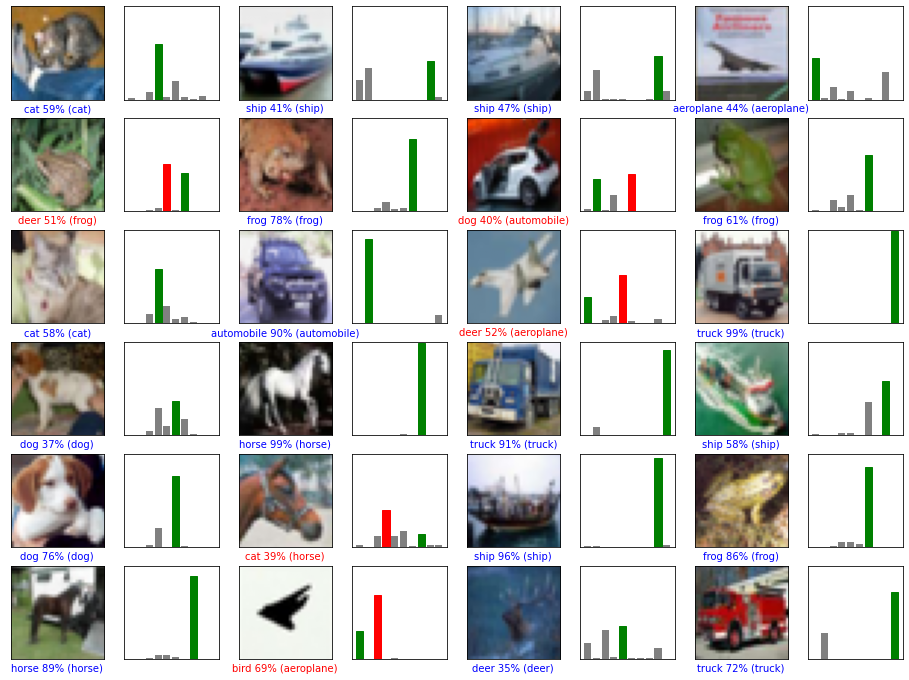

In [26]:
# verification of several images

num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i,predictions, ytest, xtest)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, ytest)
plt.show()

With a complex sequential model with multiple convolution layers and 20 epochs for the training, we obtained an accuracy ~0.91 for test prediction.